In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
us_data = pd.read_csv("C:/Users/HP/Downloads/dataset.csv")
us_data.sample(10)

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
203,1976,5,Residential,0.00,0.000,0.000,0.000,40.794,0.000,0.000,0.0,0.000,40.794,0.0,0.0,0.000,0.0
1019,1989,12,Transportation,0.00,0.000,0.000,0.000,0.000,0.000,5.783,0.0,5.783,0.000,0.0,0.0,0.000,0.0
3040,2023,9,Commerical,0.00,1.619,6.225,0.026,6.810,5.738,2.586,0.0,15.134,23.055,0.0,0.0,0.000,0.0
2421,2013,5,Electric Power,0.00,4.462,2.469,55.375,15.337,22.111,0.000,0.0,37.448,195.692,0.0,0.0,95.937,0.0
2240,2010,5,Commerical,0.04,1.571,0.378,0.005,6.079,3.599,0.282,0.0,9.959,11.953,0.0,0.0,0.000,0.0
2108,2008,2,Residential,0.00,2.092,3.262,0.000,37.240,0.000,0.000,0.0,0.000,42.594,0.0,0.0,0.000,0.0
407,1979,10,Industrial,0.81,0.000,0.000,0.000,119.317,0.000,0.000,0.0,119.317,120.127,0.0,0.0,0.000,0.0
1938,2005,4,Residential,0.00,1.307,4.378,0.000,35.342,0.000,0.000,0.0,0.000,41.027,0.0,0.0,0.000,0.0
3046,2023,10,Electric Power,0.00,4.826,47.778,124.415,10.009,13.457,0.000,0.0,23.466,261.855,0.0,0.0,61.371,0.0
2056,2007,4,Electric Power,0.00,3.951,0.186,10.822,15.063,18.106,0.000,0.0,33.170,128.973,0.0,0.0,80.845,0.0


In [13]:
us_data.isnull().sum()


Year                                  0
Month                                 0
Sector                                0
Hydroelectric Power                   0
Geothermal Energy                     0
Solar Energy                          0
Wind Energy                           0
Wood Energy                           0
Waste Energy                          0
Fuel Ethanol, Excluding Denaturant    0
Biomass Losses and Co-products        0
Biomass Energy                        0
Total Renewable Energy                0
Renewable Diesel Fuel                 0
Other Biofuels                        0
Conventional Hydroelectric Power      0
Biodiesel                             0
dtype: int64

In [14]:
features = ['Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant',
             'Total Renewable Energy', 'Renewable Diesel Fuel', 'Other Biofuels',
            'Conventional Hydroelectric Power', 'Biodiesel']

label = us_data.Sector

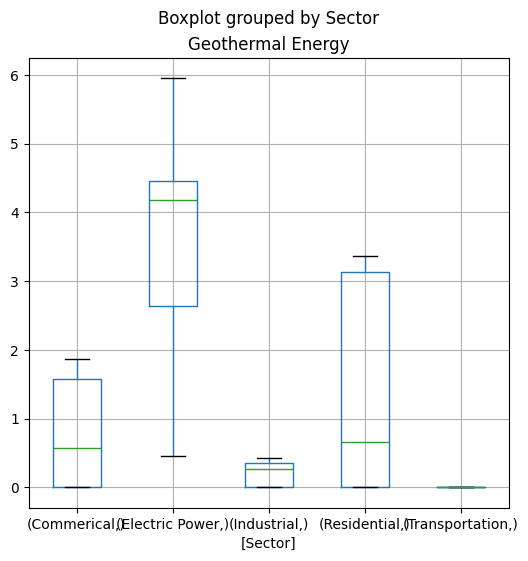

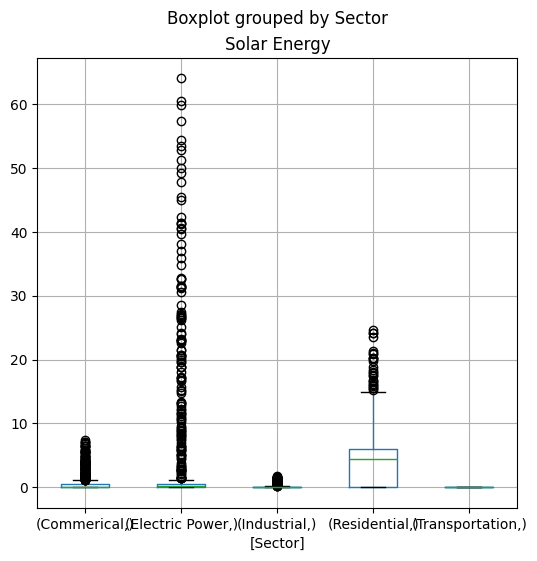

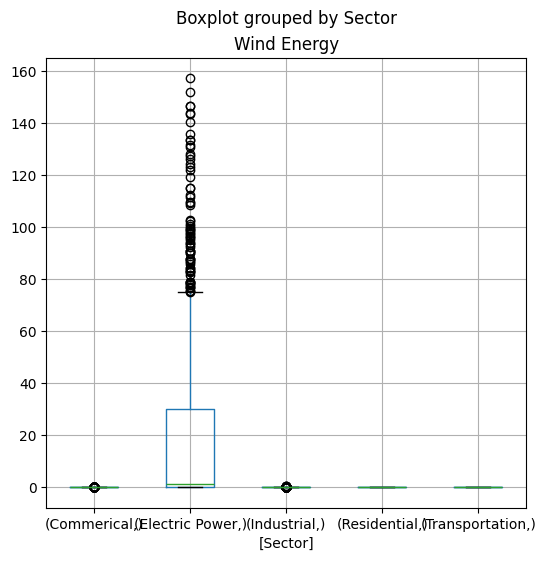

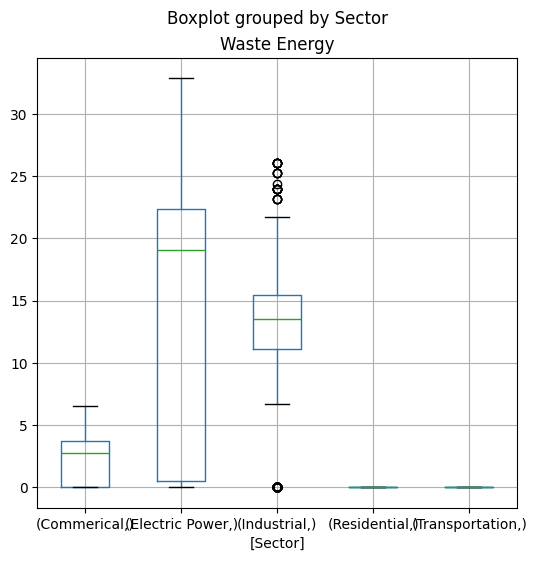

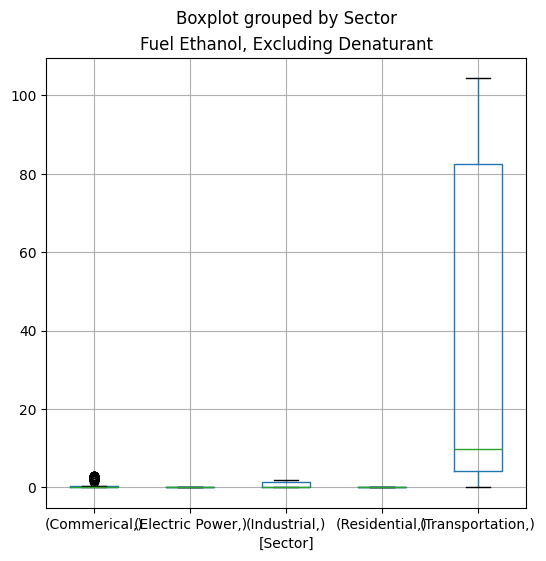

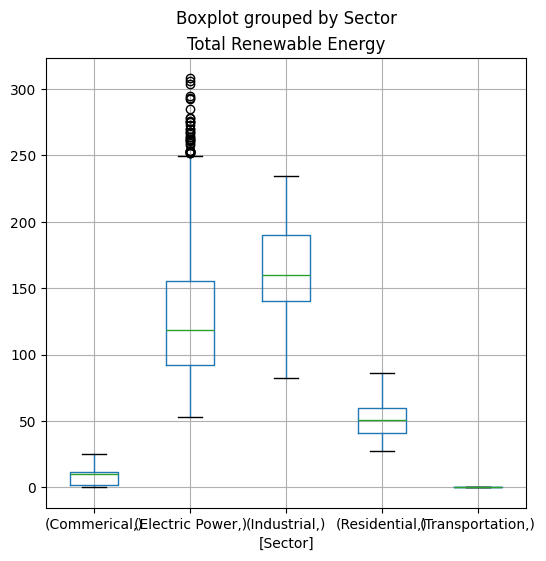

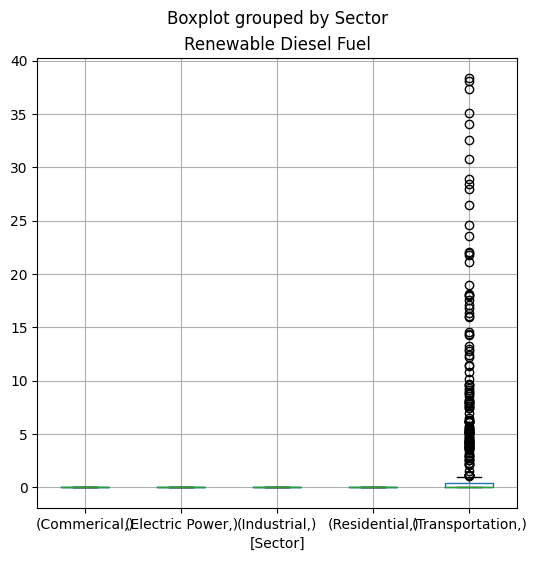

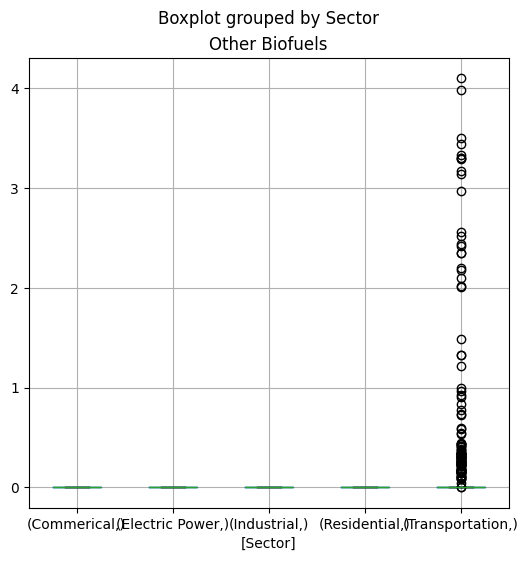

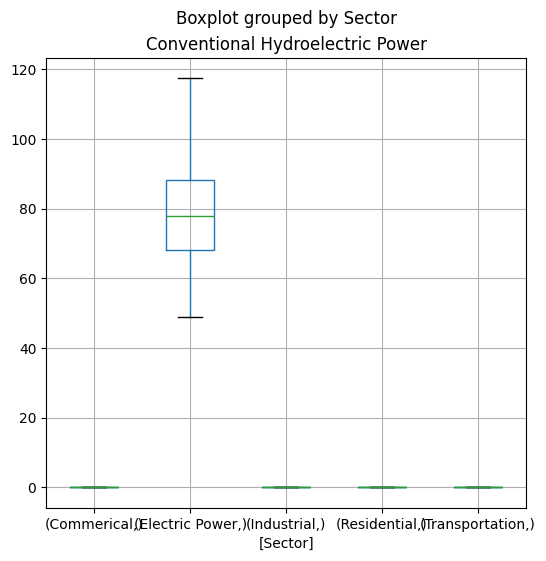

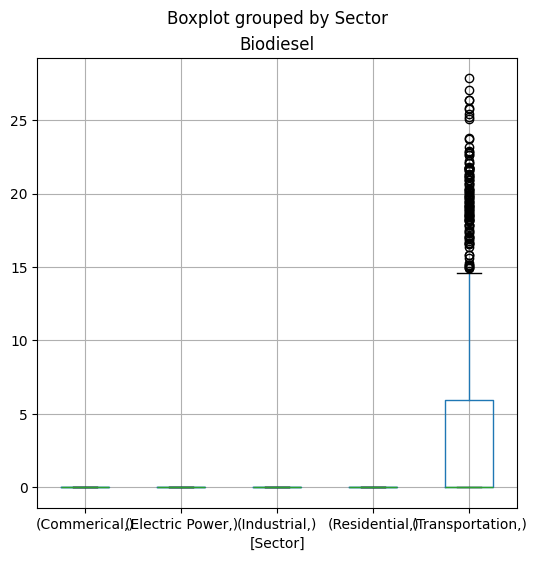

In [15]:
for col in features:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    us_data.boxplot(column=col, by=['Sector'], ax=ax)
    plt.show()

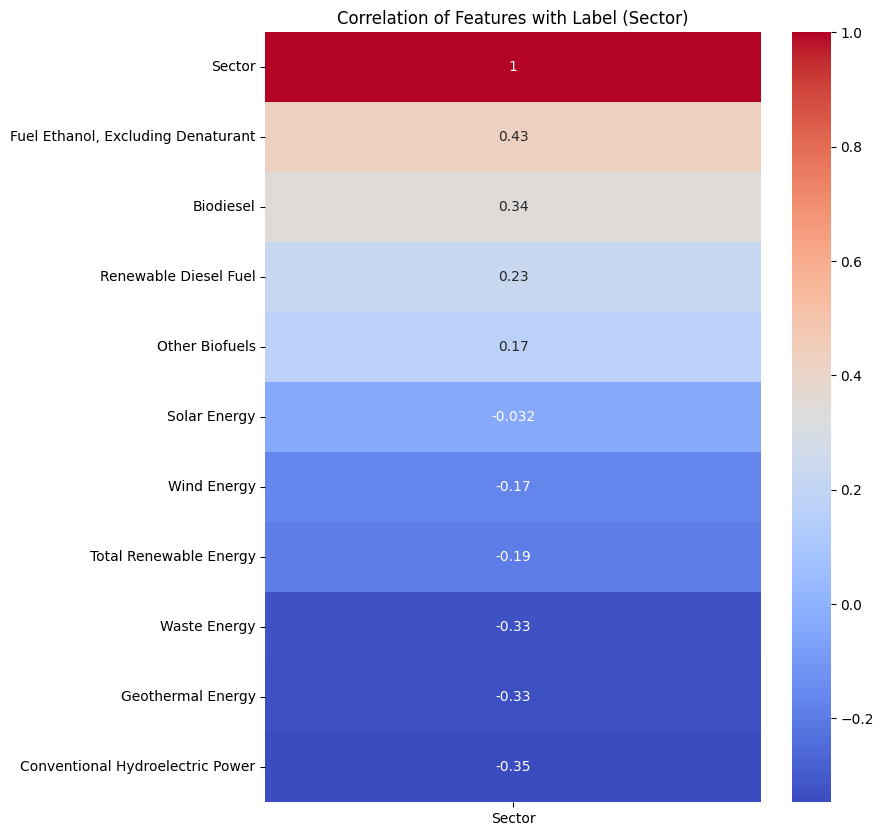

In [16]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Encode Sector into numeric labels
le = LabelEncoder()
us_data['Sector'] = le.fit_transform(us_data['Sector'])

df = us_data.copy()

# Compute correlation matrix
corr = df[features + ['Sector']].corr()

# Extract correlation between Sector and features
sector_corr = corr[['Sector']].sort_values(by='Sector', ascending=False)


# Plot heatmap
plt.figure(figsize=(8, 10))
sns.heatmap(sector_corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Label (Sector)')
plt.show()








In [17]:
from sklearn.model_selection import train_test_split
x = us_data[['Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant',
             'Total Renewable Energy', 'Renewable Diesel Fuel', 'Other Biofuels',
            'Conventional Hydroelectric Power', 'Biodiesel']].values

y = us_data.Sector

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

pred = model.predict(x_test)


print('ACC: ', accuracy_score(y_test, pred))
print('Report: ', classification_report(y_test, pred))
print('Precision: ', precision_score(y_test, pred, average='macro'))
print('Recall: ', recall_score(y_test, pred, average='macro'))

y_scores = model.predict_proba(x_test)
print('ROC: ', roc_auc_score(y_test, y_scores, multi_class='ovr'))




ACC:  0.9989130434782608
Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00       184
           2       1.00      0.99      1.00       184
           3       0.99      1.00      1.00       184
           4       1.00      1.00      1.00       184

    accuracy                           1.00       920
   macro avg       1.00      1.00      1.00       920
weighted avg       1.00      1.00      1.00       920

Precision:  0.998918918918919
Recall:  0.9989130434782609
ROC:  0.9999793241965973


C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
import pickle
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('us_data_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load model and label encoder
model = pickle.load(open('us_data_model.pkl', 'rb'))
le = pickle.load(open('label_encoder.pkl', 'rb'))

# New sample to predict
X_new = [[0.000, 0.000, 0.000, 0.000, 0.000, 40.794, 0.0, 0.0, 0.000, 0.0]]

raw_pred = model.predict(X_new)[0]
decoded_pred = le.inverse_transform([raw_pred])[0]

# Predict
raw_pred = model.predict(X_new)[0]
decoded_pred = le.inverse_transform([raw_pred])[0]

print("Raw Prediction (numeric):", raw_pred)
print("Decoded Sector Label:", decoded_pred)

# Optional: Show label mapping
print("Label Mapping:")
for i, label in enumerate(le.classes_):
    print(f"{i} => {label}")




Raw Prediction (numeric): 3
Decoded Sector Label: Residential
Label Mapping:
0 => Commerical
1 => Electric Power
2 => Industrial
3 => Residential
4 => Transportation
